[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/Code_11_2_Classification_Trees.ipynb)

Load a bunch of libraries and load the raisin data set again.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score


In [ ]:
raisin = pd.read_csv("https://richardson.byu.edu/220/raisin.csv")
raisin

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


A classification tree ends in terminal nodes that are predicted labels, meaning each node will be assigned to either Kecimen or Besni for the raisin data.

[Text(0.5, 0.875, 'MajorAxisLength <= 422.423\ngini = 0.5\nsamples = 900\nvalue = [450, 450]'),
 Text(0.25, 0.625, 'Perimeter <= 1124.339\ngini = 0.276\nsamples = 490\nvalue = [81, 409]'),
 Text(0.125, 0.375, 'Eccentricity <= 0.871\ngini = 0.227\nsamples = 445\nvalue = [58, 387]'),
 Text(0.0625, 0.125, 'gini = 0.21\nsamples = 437\nvalue = [52, 385]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.375, 0.375, 'Extent <= 0.729\ngini = 0.5\nsamples = 45\nvalue = [23, 22]'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(0.4375, 0.125, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.75, 0.625, 'MajorAxisLength <= 452.894\ngini = 0.18\nsamples = 410\nvalue = [369, 41]'),
 Text(0.625, 0.375, 'ConvexArea <= 77974.5\ngini = 0.447\nsamples = 92\nvalue = [61, 31]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6875, 0.125, 'gini = 0.472\nsamples = 81\nvalue = [50, 31]'),
 Text(0.875, 0.375, 'Perimeter 

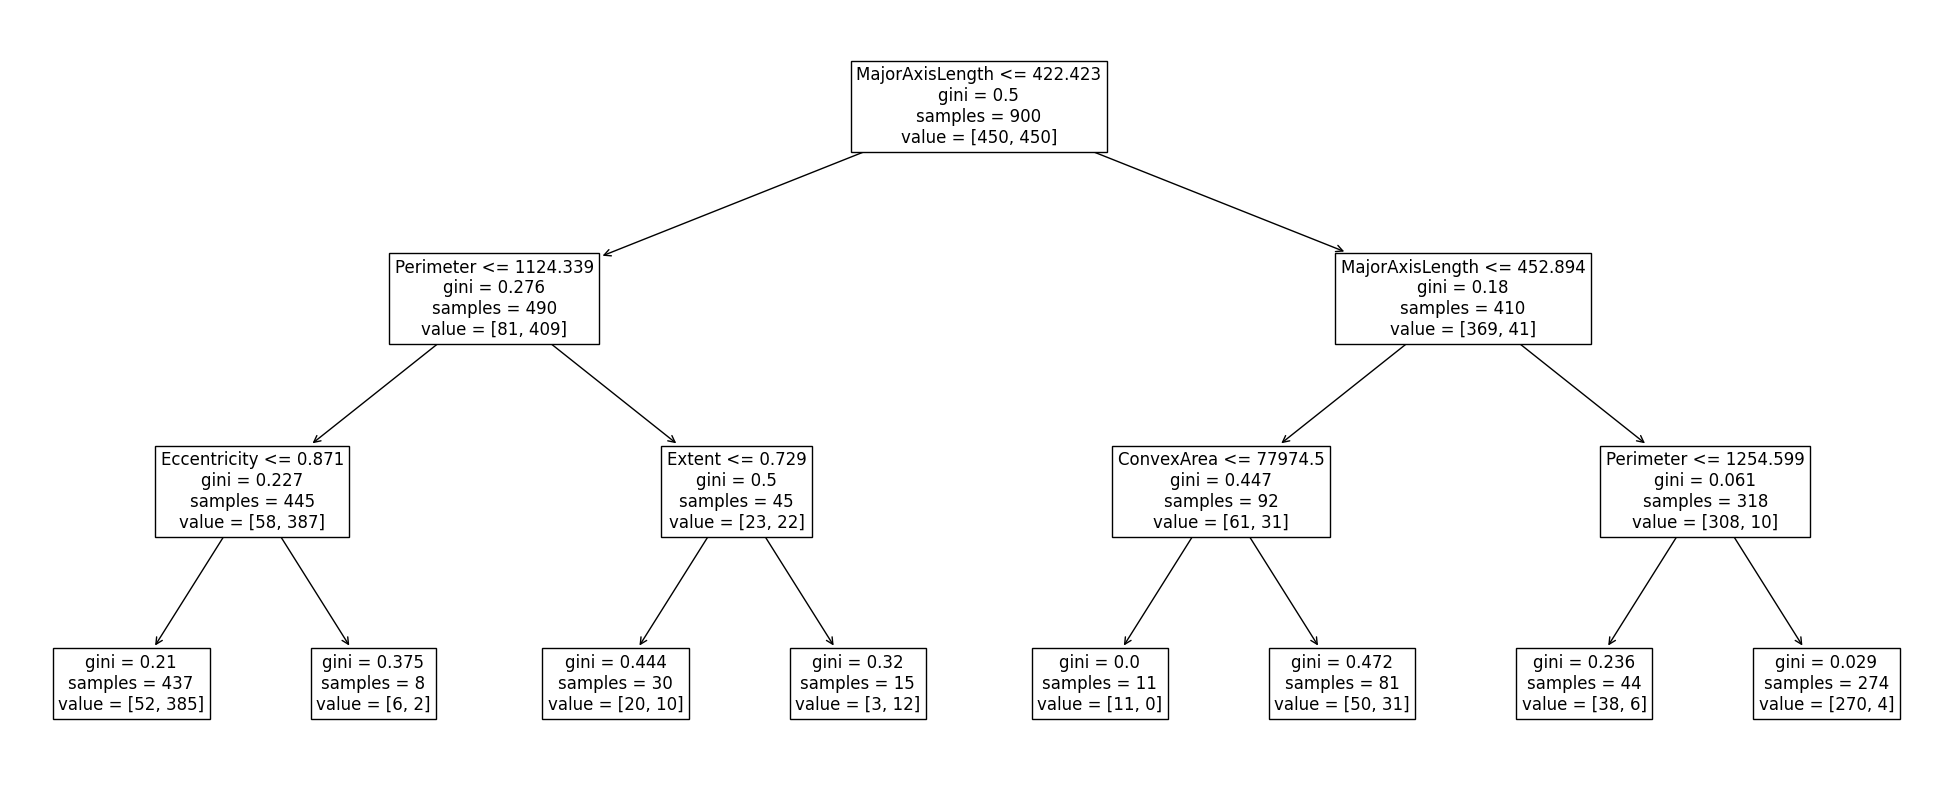

In [ ]:
# Make X and y. We don't need to standardize the X's for a standard decision tree
# It never hurts to, though.
y = raisin.Class == "Kecimen"
X = raisin.drop(columns = ["Class"])

# The DecisionTreeClassifier module builds classification trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Initialize a tree with a max depth of 3 (to make sure we
# can visualize it okay)
ctree = DecisionTreeClassifier(max_depth = 3)

# Fit and plot the tree
ctree.fit(X, y)
plt.figure(figsize = (25,10))
tree.plot_tree(ctree, feature_names=X.columns,fontsize = 12)

Accuracy

In [ ]:
ctree.score(X, y)

0.88

In [ ]:
ctree.predict_proba(X)

array([[0.61728395, 0.38271605],
       [0.11899314, 0.88100686],
       [0.61728395, 0.38271605],
       ...,
       [0.61728395, 0.38271605],
       [0.98540146, 0.01459854],
       [0.98540146, 0.01459854]])

AUC

In [ ]:
roc_auc_score(y,ctree.predict_proba(X)[:,1])

0.917758024691358

Confusion Matrix

In [ ]:
confusion_matrix(y, ctree.predict(X))

array([[395,  55],
       [ 53, 397]])

Feature importances can be found for classification trees.

<Axes: >

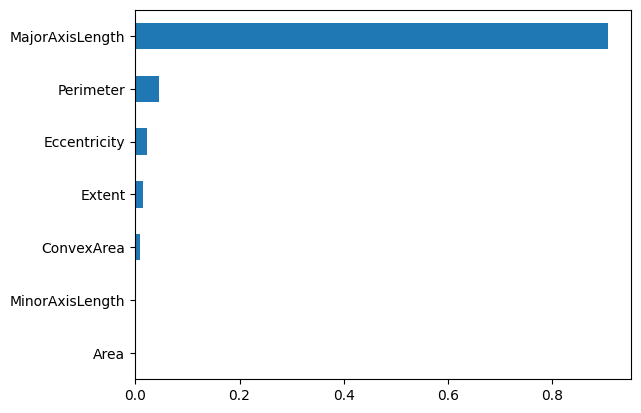

In [ ]:
pd.Series(ctree.feature_importances_, index=X.columns).sort_values().plot(kind='barh')

Tuning and comparing between models is still important for classification. We can use out of sample accuracy or AUC to determine a good model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1357)

from sklearn.linear_model import LogisticRegression

# The logistic regression module cn be used to build
# a logistic regression model
log_mod = LogisticRegression(max_iter = 1000)
log_mod.fit(X_train,y_train)

ctree = DecisionTreeClassifier(max_depth = 3)
ctree.fit(X_train, y_train)

print("The logistic regression model has an out of sample accuracy of", log_mod.score(X_test,y_test))
print("The classification tree model has an out of sample accuracy of", ctree.score(X_test,y_test))

print("The logistic regression model has an out of sample AUC of", roc_auc_score(y_test,log_mod.predict_proba(X_test)[:,1]))
print("The classification tree model has an out of sample AUC of", roc_auc_score(y_test,ctree.predict_proba(X_test)[:,1]))

The logistic regression model has an out of sample accuracy of 0.8666666666666667
The classification tree model has an out of sample accuracy of 0.8592592592592593
The logistic regression model has an out of sample AUC of 0.9220400528169014
The classification tree model has an out of sample AUC of 0.8771456866197185


Tune both models first and then compare

Find all possible complexity parameters and their in-sample impurities.

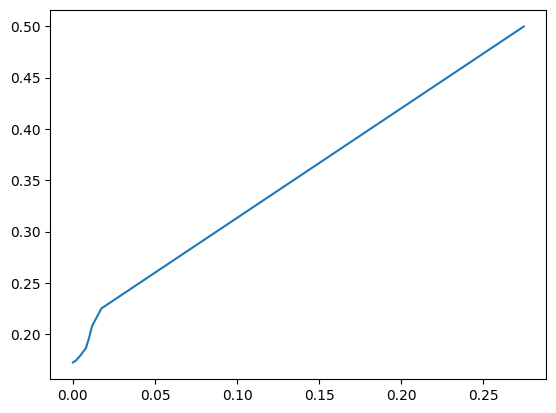

In [ ]:
path = ctree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas,impurities)

R2 = accuracy

In [ ]:
acc_in = []
acc_out = acc_in.copy()

# Do a loop testing different alphas and calculating in sample and out of sample R^2 values
for ccp_alpha in ccp_alphas:
    tree_temp = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    tree_temp.fit(X_train, y_train)
    acc_in.append(tree_temp.score(X_train,y_train))
    acc_out.append(tree_temp.score(X_test,y_test))

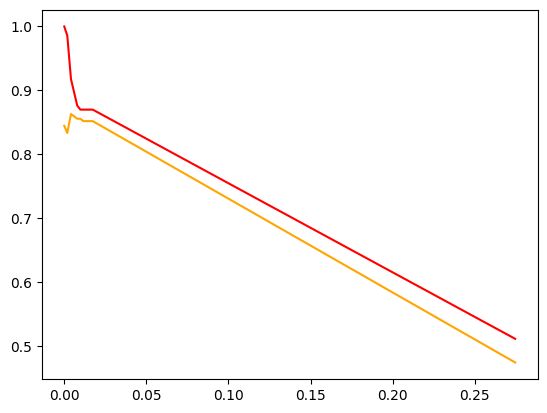

In [ ]:
#grid = np.linspace(0.00001,0.25,len(R2_in))
plt.plot(ccp_alphas,acc_in,color="r")
plt.plot(ccp_alphas,acc_out,color = "orange")
plt.show()

In [ ]:
best_alpha = ccp_alphas[np.argmax(acc_out)]
best_alpha

0.004100800156128029

[Text(0.5909090909090909, 0.9, 'MajorAxisLength <= 422.423\ngini = 0.5\nsamples = 900\nvalue = [450, 450]'),
 Text(0.36363636363636365, 0.7, 'Perimeter <= 1124.339\ngini = 0.276\nsamples = 490\nvalue = [81, 409]'),
 Text(0.18181818181818182, 0.5, 'Eccentricity <= 0.871\ngini = 0.227\nsamples = 445\nvalue = [58, 387]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.21\nsamples = 437\nvalue = [52, 385]'),
 Text(0.2727272727272727, 0.3, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.5454545454545454, 0.5, 'Extent <= 0.729\ngini = 0.5\nsamples = 45\nvalue = [23, 22]'),
 Text(0.45454545454545453, 0.3, 'Eccentricity <= 0.763\ngini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(0.36363636363636365, 0.1, 'gini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.5454545454545454, 0.1, 'gini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.6363636363636364, 0.3, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.8181818181818182, 0.7, 'MajorAxisLength <= 452.894\ngini = 0.18\nsamples = 41

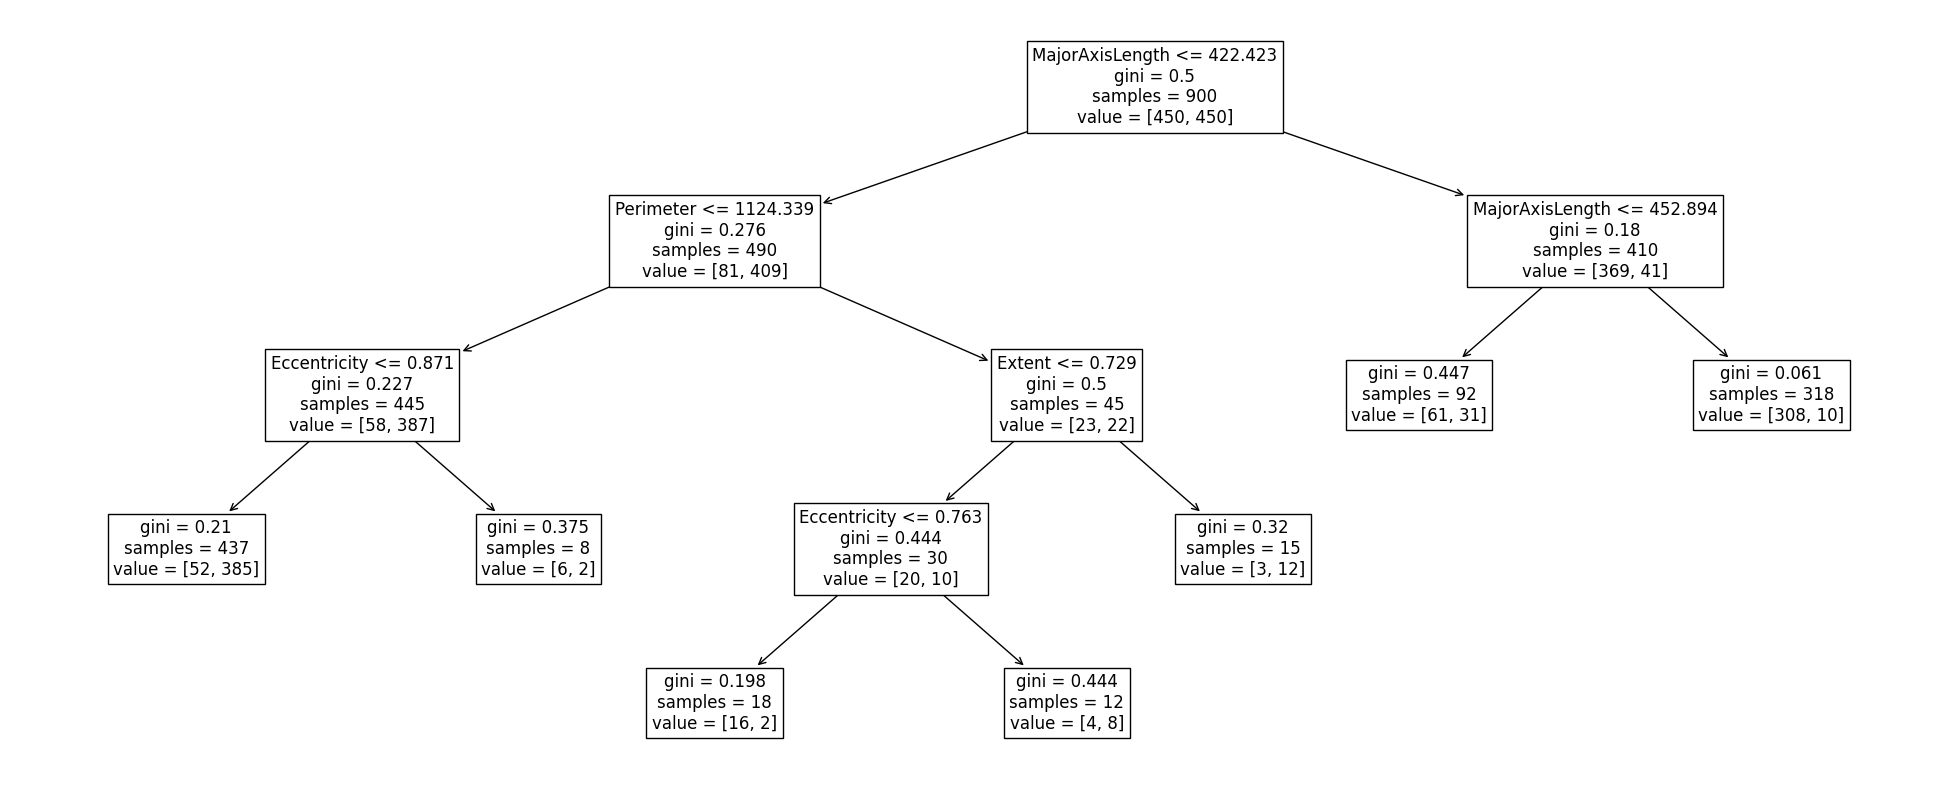

In [ ]:
ctree = DecisionTreeClassifier(ccp_alpha = best_alpha)
ctree.fit(X, y)
plt.figure(figsize = (25,10))
tree.plot_tree(ctree, feature_names=X.columns,fontsize = 12)

Tune the logitsic regression model

In [36]:
import statsmodels.api as sm
X1_train = sm.add_constant(X_train)
mod2 = sm.Logit(y_train, X1_train)
result = mod2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.327648
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  630
Model:                          Logit   Df Residuals:                      622
Method:                           MLE   Df Model:                            7
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.5271
Time:                        18:32:32   Log-Likelihood:                -206.42
converged:                       True   LL-Null:                       -436.53
Covariance Type:            nonrobust   LLR p-value:                 2.838e-95
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.5409      8.845      0.287      0.774     -14.795      19.877
Area               -0.0003      0.000     -1.459      0.145      -0.001    9.23e-05
MajorAxisLength     0.0398      0.020      2.007      0.045       0.001       0.079
MinorAxisLength     0.0943      0.034      2.764      0.006       0.027       0.161
Eccentricity        4.7385      6.418      0.738      0.460      -7.840      17.317
ConvexArea          0.0002      0.000      0.911      0.362      -0.000       0.001
Extent             -2.3978      3.300     -0.727      0.467      -8.866       4.071
Perimeter          -0.0325      0.008     -3.844      0.000      -0.049      -0.016
===================================================================================
"""

In [40]:
#X1_train = X1_train.drop(columns = ["Extent"])
#X1_train = X1_train.drop(columns = ["Eccentricity"])
#X1_train = X1_train.drop(columns = ["ConvexArea"])
X1_train = X1_train.drop(columns = ["Area"])

mod2 = sm.Logit(y_train, X1_train)
result = mod2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.330988
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  630
Model:                          Logit   Df Residuals:                      626
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.5223
Time:                        18:35:37   Log-Likelihood:                -208.52
converged:                       True   LL-Null:                       -436.53
Covariance Type:            nonrobust   LLR p-value:                 1.627e-98
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.2426      1.080     11.340      0.000      10.127      14.358
MajorAxisLength     0.0122      0.009      1.331      0.183      -0.006       0.030
MinorAxisLength     0.0359      0.008      4.282      0.000       0.019       0.052
Perimeter          -0.0232      0.005     -4.545      0.000      -0.033      -0.013
===================================================================================
"""

In [45]:
# The logistic regression module cn be used to build
# a logistic regression model
log_mod = LogisticRegression(max_iter = 1000)
X_train_small = X_train.drop(columns = ["Extent","Eccentricity","ConvexArea","Area"])
X_test_small = X_test.drop(columns = ["Extent","Eccentricity","ConvexArea","Area"])
log_mod.fit(X_train_small,y_train)

ctree = DecisionTreeClassifier(ccp_alpha= best_alpha)
ctree.fit(X_train, y_train)

print("The logistic regression model has an out of sample accuracy of", log_mod.score(X_test_small,y_test))
print("The classification tree model has an out of sample accuracy of", ctree.score(X_test,y_test))

print("The logistic regression model has an out of sample AUC of", roc_auc_score(y_test,log_mod.predict_proba(X_test_small)[:,1]))
print("The classification tree model has an out of sample AUC of", roc_auc_score(y_test,ctree.predict_proba(X_test)[:,1]))

The logistic regression model has an out of sample accuracy of 0.8629629629629629
The classification tree model has an out of sample accuracy of 0.8592592592592593
The logistic regression model has an out of sample AUC of 0.9282570422535212
The classification tree model has an out of sample AUC of 0.8655369718309859
